In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
import scipy
print(scipy.__version__)

1.7.1


In [7]:
#pip install --upgrade scipy

# EXERCISE 1.
The hourly wages in a particular industry are normally distributed with mean $13.20  and standard deviation $2.50. \
A company in this industry employs 40 workers, paying them an average of $12.20 per hour. \
Can this company be accused of paying substandard wages? \
Use an α = .01 level test. (Wackerly, Ex.10.18)



<font color='red'>
</font>

H0 : mu = 13.20

H1 : mu < 13.20
one tailed test, left

α = .01 level

<font color='red'>mu0
</font>  = 13.20   ,zero hypo mean\
<font color='red'>xbarr</font>= 12.20  ,sample mean\
<font color='red'>s </font>= 2.5       ,population mean, we use it for sample mean\
<font color='red'>n </font>= 40        ,sample size

one sample T-test formula :

<font color='red'> t = (xbarr-mu0) / (s/√n) </font>


In [11]:
sample_std_err = 2.5 / np.sqrt(40)
my_Ztest = (12.20 - 13.20) / sample_std_err
my_Ztest

-2.5298221281347035

In [14]:
stats.norm.cdf(my_Ztest)

0.005706018193000826

In [12]:
p_value = stats.norm.cdf(x = 12.20, loc=13.20, scale=sample_std_err)
p_value

0.005706018193000826

In [13]:
alpha=0.01
if p_value<0.01 :
  print("reject the null")
else:
  print("fail to reject the null")

reject the null


# EXERCISE 2.
Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). 
Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

In [16]:
df = pd.read_csv('/Users/oscar/Downloads/soil - Sheet1.csv')

In [19]:
df.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Soil1   30 non-null     float64
 1   Soil2   35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [31]:
#Perform Levene test for equal variances
#H0: The population variances are equal
#H1: There is a difference between the variances in the population
#The small p-value suggests that the populations do not have equal variances.
levene_test = stats.levene(df['Soil1'][:30], df['Soil2'])
levene_test

LeveneResult(statistic=0.31486292982090475, pvalue=0.5767018253541134)

In [36]:
my_Ttest_2 = stats.ttest_ind(df['Soil1'], df['Soil2'], equal_var=True, nan_policy='omit')
my_Ttest_2

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.5932287323528147e-06)

In [37]:
p_value = my_Ttest_2.pvalue
p_value

2.5932287323528147e-06

In [38]:
if p_value<0.01 :
  print("reject the null")
else:
  print("fail to reject the null")

reject the null


# EXERCISE 3. 
The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  
2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).

Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

In [72]:
df = pd.read_csv('/Users/oscar/Downloads/2015 PISA Test - Sheet1.csv')
df.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [58]:
df.groupby('Continent_Code', dropna=False).describe().T


Continent_Code                        AF          AS          EU          OC  \
internet_users_per_100 count    2.000000   17.000000   37.000000    2.000000   
                       mean    43.359918   68.455613   77.274888   86.391704   
                       std      7.297226   21.086060   12.425773    2.589686   
                       min     38.200000   21.976068   53.744979   84.560519   
                       25%     40.779959   50.300000   68.632900   85.476112   
                       50%     43.359918   74.000000   76.184000   86.391704   
                       75%     45.939877   84.948353   87.479056   87.307296   
                       max     48.519836   92.884826   98.200000   88.222889   
Math                   count    2.000000   17.000000   37.000000    2.000000   
                       mean   363.212100  466.216647  477.981449  494.559750   
                       std      5.099513   64.356490   35.150403    0.938401   
                       min    359.606200  380.259000  371.311400  493.896200   
                       25%    361.409150  403.833200  464.040100  494.227975   
                       50%    363.212100  459.816000  489.728700  494.559750   
                       75%    365.015050  531.296100  503.722000  494.891525   
                       max    366.818000  564.189700  521.250600  495.223300   
Reading                count    2.000000   17.000000   37.000000    2.000000   
                       mean   355.457400  454.059682  476.164608  506.085650   
                       std      7.916909   57.048962   37.720545    4.504341   
                       min    349.859300  346.549000  351.741500  502.900600   
                       25%    352.658350  408.102200  452.514300  504.493125   
                       50%    355.457400  433.542300  487.250100  506.085650   
                       75%    358.256450  508.690500  499.814600  507.678175   
                       max    361.055500  535.100200  526.424700  509.270700   
Science                count    2.000000   17.000000   37.000000    2.000000   
                       mean   381.074250  467.945847  478.299381  511.648700   
                       std      7.536556   56.671371   34.450616    2.340241   
                       min    375.745100  386.485400  383.682400  509.993900   
                       25%    378.409675  417.611200  460.774900  510.821300   
                       50%    381.074250  456.483600  490.225000  511.648700   
                       75%    383.738825  523.277400  501.936900  512.476100   
                       max    386.403400  555.574700  534.193700  513.303500   

Continent_Code                        SA         NaN  
internet_users_per_100 count    7.000000    5.000000  
                       mean    60.180494   66.886792  
                       std      9.772455   14.364359  
                       min     40.900000   54.215766  
                       25%     57.116462   57.431043  
                       50%     64.289000   59.762950  
                       75%     66.321532   74.554202  
                       max     69.198471   88.470000  
Math                   count    7.000000    5.000000  
                       mean   402.887700  424.250960  
                       std     18.128894   71.717058  
                       min    377.069500  327.702000  
                       25%    388.102200  400.253400  
                       50%    409.033300  408.023500  
                       75%    417.617650  469.628500  
                       max    422.671400  515.647400  
Reading                count    7.000000    5.000000  
                       mean   425.359229  446.420920  
                       std     19.709688   66.614744  
                       min    397.541400  357.737700  
                       25%    416.126900  423.276500  
                       50%    425.303100  427.487500  
                       75%    431.922700  496.935100  
                       max    458.57090

In [59]:
my_groupby.EU.Math

count     37.000000
mean     477.981449
std       35.150403
min      371.311400
25%      464.040100
50%      489.728700
75%      503.722000
max      521.250600
Name: EU, dtype: float64

In [62]:
levene_test_3 = stats.levene(df[df['Continent_Code'] == "EU"]['Math'], df[df['Continent_Code'] == "AS"]['Math'])
levene_test_3

LeveneResult(statistic=14.300030628780675, pvalue=0.0004037413184451079)

In [65]:
my_tTest_3 = stats.ttest_ind(df[df['Continent_Code'] == "EU"]['Math'], df[df['Continent_Code'] == "AS"]['Math'], equal_var=True)
my_tTest_3


Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

In [66]:

if my_tTest_3.pvalue<0.05 :
  print("reject the null")
else:
  print("fail to reject the null")

fail to reject the null


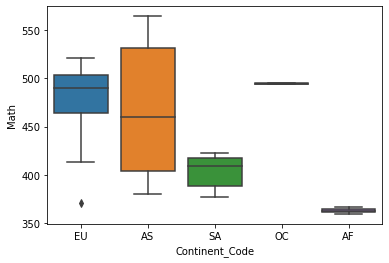

In [73]:
sns.boxplot(x='Continent_Code', y='Math', data=df)
plt.show()

# EXERCISE 4.
The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. 

Students in the sample completed all 4 placement tests when they enrolled in the university. 

Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. 

We could use a paired t test to test if there was a significant difference in the average of the two tests.

Sample Dataset 2014

CHECK: statistic=36.312568981719856, pvalue=3.0710987192210606e-128

In [74]:
df = pd.read_csv('/Users/oscar/Downloads/students_2014 - students_2014.csv')
df.head()

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,3/22/1995,NaN,NaN,NaN,NaN,0.0,0,72.35,NaN,...,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
1,20278,1/1/1995,NaN,NaN,NaN,Philosophy,0.0,0,70.66,179.20,...,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0
2,20389,12/31/1994,NaN,NaN,NaN,NaN,0.0,0,70.68,198.52,...,96.73,86.88,71.20,84.24,In state,NaN,NaN,NaN,8.0,7.0
3,22820,12/1/1994,NaN,NaN,NaN,business administration,1.0,0,NaN,198.34,...,74.06,88.68,55.89,73.16,In state,1.0,NaN,NaN,2.0,6.0
4,24559,11/10/1994,NaN,NaN,NaN,NaN,1.0,1,67.43,128.17,...,82.61,77.30,65.52,80.45,Out of state,1.0,NaN,NaN,7.0,3.0


In [75]:
stats.shapiro(df.English.dropna())

ShapiroResult(statistic=0.9965985417366028, pvalue=0.5434104800224304)

In [76]:
stats.shapiro(df.Math.dropna())

ShapiroResult(statistic=0.9952573776245117, pvalue=0.22645071148872375)

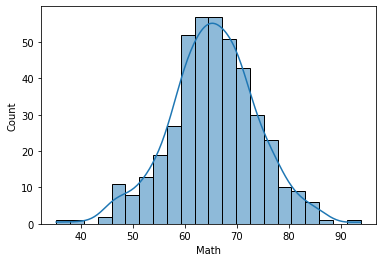

In [78]:
ax = sns.histplot(x = 'Math', data=df, kde=True)

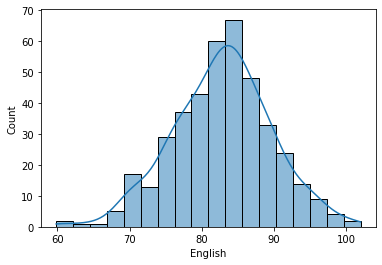

In [79]:
ax = sns.histplot(x = 'English', data=df, kde=True)

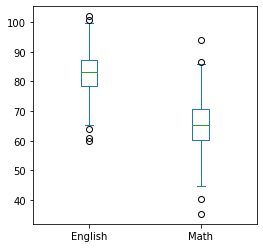

In [102]:

df[['English', 'Math']].plot(kind='box', figsize=(4,4));


hypothesis H0: m1=m2 H1: m1!=m2(two side)

In [103]:
indTest = stats.ttest_rel(df.English,df.Math,nan_policy="omit")   
indTest

Ttest_relResult(statistic=36.31256898171986, pvalue=3.071098719220689e-128)

In [104]:
p_value=indTest.pvalue
p_value

3.071098719220689e-128

In [105]:
alpha=0.05
if p_value<alpha :
  print("reject the null")
else:
  print("fail to reject the null")

reject the null
